Name : Akshaya Brian Tauro, ID : A20502097, Course Number : CS 584, Semester : Fall 2022

####This file consists of code to evaluate the predictions made using just classical CNN Model Vs Transfer Learning Model Vs Meta Learning(Reptile Algorithm - Few Shots Learning)

In [12]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np


In [14]:
img_rows = 150
img_cols = 150

myData_dataset_path = r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/all_model_testdata"
myData_images = os.listdir(r"/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/all_model_testdata")

os.chdir(myData_dataset_path)
Class_names = ['COVID19',  'PNEUMONIA', 'TUBERCULOSIS', 'NORMAL']

In [15]:
def model_predictions(model,approach):
  fig, ax = plt.subplots(1, 4, figsize=(15, 10))
  
  for i in range(len(myData_images)):
     if(approach == "TL"):
       image = tf.keras.preprocessing.image.load_img(myData_images[i], target_size=(img_rows, img_cols))
     else:   
       image = tf.keras.preprocessing.image.load_img(myData_images[i], target_size=(img_rows, img_cols),  color_mode='grayscale' )
     input_arr = tf.keras.preprocessing.image.img_to_array(image)
     input_arr = np.array([input_arr])     
     input_arr = input_arr.astype('float32') / 255.   
     predictions = model.predict(input_arr)   
     predicted_class = np.argmax(predictions, axis=-1)   
     labels = {'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2, 'TUBERCULOSIS': 3}
     labels = dict((i,j) for j,i in labels.items())
     pred = [labels[j] for j in predicted_class]
     img = plt.imread(myData_images[i])
     ax[i].imshow(img, cmap="gray")
     ax[i].set_title("Label : {},  \n  Predicted : {}".format(str(Class_names[i]), str(pred)))
     ax[i].axis('off')

###Respiratory Disease Detection (Reptile Algorithm)

1/1 [==============================] - 0s 32ms/step


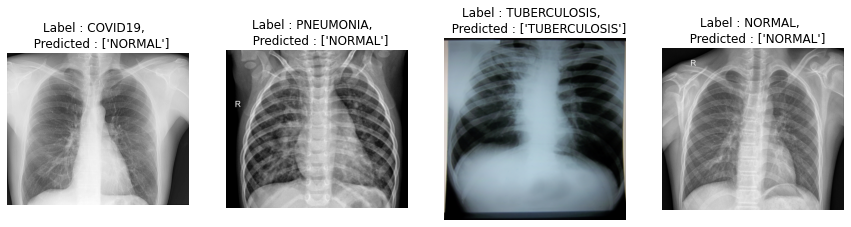

In [16]:
from keras.models import load_model
model = load_model("/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/models/RespiratoryDiseaseDetection-MetaLearning-FewShot-Reptile.h5")

model_predictions(model, "Reptile Algorithm")    


### Respiratory Disease Detection (CNN)
#### Meta Data

1/1 [==============================] - 0s 31ms/step


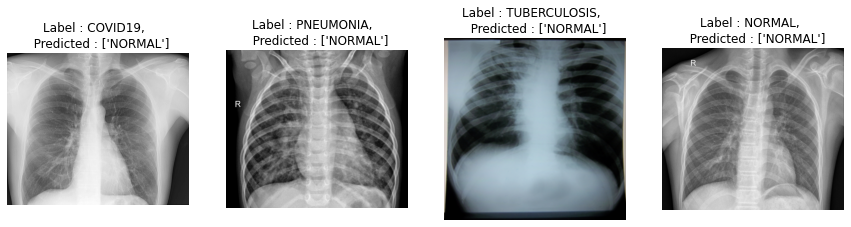

In [17]:
from keras.models import load_model
model = load_model("/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/models/RespiratoryDiseaseDetection-MetaData-CNN-grayscale.h5")

model_predictions(model,"CNN")

###Respiratory Disease Detection (Transfer Learning)
#### Meta Data

1/1 [==============================] - 0s 223ms/step


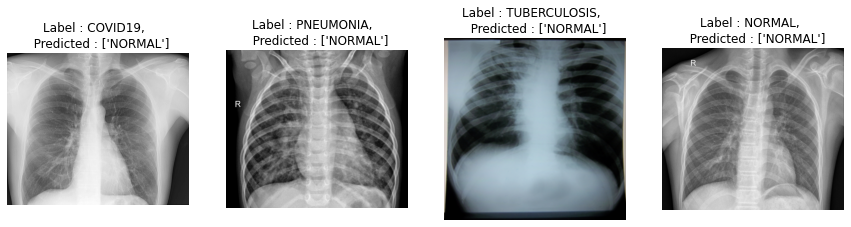

In [18]:
from keras.models import load_model
model = load_model("/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/models/RespiratoryDiseaseDetection-MetaData-TransferLearning.h5")

model_predictions(model,"TL")

### Respiratory Disease Detection (CNN)
#### Complete Dataset

1/1 [==============================] - 0s 29ms/step


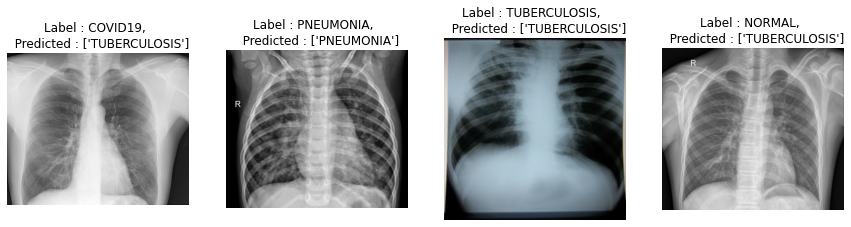

In [19]:
from keras.models import load_model
model = load_model("/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/models/RespiratoryDiseaseDetection-CNN-grayscale.h5")

model_predictions(model, "CNN")

###Respiratory Disease Detection (Transfer Learning)
#### Complete Dataset

1/1 [==============================] - 0s 239ms/step


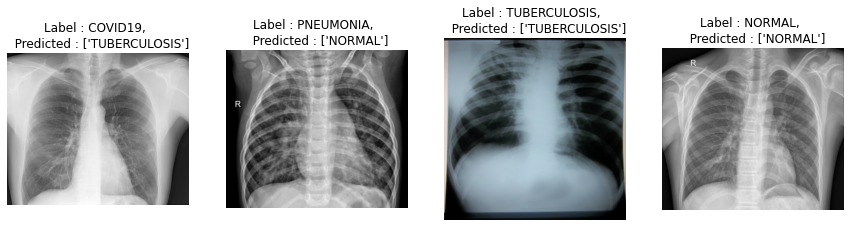

In [20]:
from keras.models import load_model
model = load_model("/content/drive/MyDrive/Colab Notebooks/ML/ML_Project/data/models/RespiratoryDiseaseDetection-TransferLearning.h5")

model_predictions(model, "TL")